In [ ]:
!pip install gensin

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns

import re

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Replace '/content/drive/MyDrive/reviews.csv' with the actual path to your file
reviews = pd.read_csv('/content/drive/MyDrive/Product_Reviews.csv')

In [ ]:
data= reviews.copy()

In [ ]:
data.shape

(1007, 3)

In [ ]:
data.head(5)

,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",POSITIVE
1,AVpe7AsMilAPnD_xQ78G,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet.,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,"I bought one of the first Paperwhites and have been very pleased with it its been a constant companion and I suppose Ive read, on average, a book every three days for the past however many years on it. I wouldnt give it up youd have to pry it from my cold dead fingers.For sundry logistical reasons, Ive also made good use of Amazons Kindle app on my iPhone. No Paperwhite screen, naturally, and all the cool usability that delivers, but it works well and has its own attractions as a companion to the Kindle.Of course, there are aspects of the Paperwhite which I would like to critique. Ah you knew that was coming somewhere, didnt you.As a member of BookBub, I get a daily list of alerts and book deals in my chosen genres. I take on many of them, however, Ive found that, even with the best will in the world, I cant keep up. Some days it seems that for every book I read, Ive bought two. Theres just so much good stuff out there! The accumulative effect of this is that the number of books actually on my Paperwhite has been creeping ever upward for some time. Its now at about 400.With this in mind, Ive noticed that while page-turning has remained exactly the 

In [ ]:
data.duplicated().sum()

2

In [ ]:
data = data.drop_duplicates()
data. duplicated().sum()

0

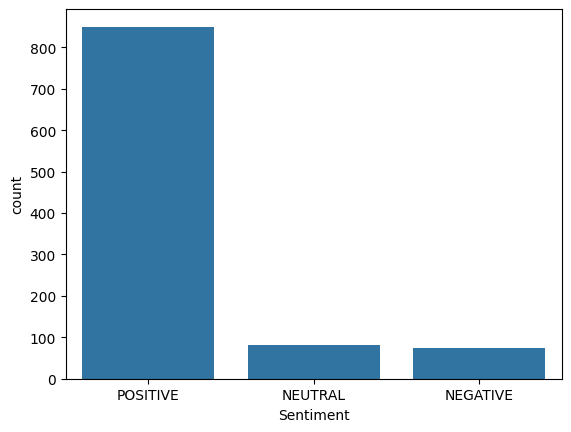

In [ ]:
sns.countplot(data=data, x="Sentiment");

In [ ]:
data['Sentiment'].value_counts(normalize=True)

,proportion
Sentiment,
POSITIVE,0.845771
NEUTRAL,0.080597
NEGATIVE,0.073632


In [ ]:
def remove_special_characters(text):
  pattern = '[^A-Za-z0-9]+'
  new_text = ''.join(re.sub(pattern, ' ', text))
  return new_text

In [ ]:
from itertools import product
data['cleaned_text'] = data['Product Review'].apply(remove_special_characters)

In [ ]:
data.loc[0:3, ['Product Review', 'cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage Fortunately I had friends who owned each so I ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment It s been a week and I am loving my paperwhite no regrets The touch screen is receptive and easy to use and I keep the light at a specific setting regardless of the time of day In any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading Also glad that I went for the international shipping option with Amazon Extra expense but delivery was on time with tracking and I didnt need to worry about customs which I may have if I used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",Allow me to preface this with a little history I am was a casual reader who owned a Nook Simple Touch from 2011 I ve read the Harry Potter series Girl with the Dragon Tattoo series 1984 Brave New World and a few other key titles Fair to say my Nook did not get as much use as many others may have gotten from theirs Fast forward to today I have had a full week with my new Kindle Paperwhite and I have to admit I m in love Not just w

In [ ]:
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [ ]:
data.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just w

In [ ]:
data['cleaned_text'] = data['cleaned_text'].str.strip()
data.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just w

In [ ]:
def remove_stopwords(text):
    words = text.split()
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])
    return new_text

In [ ]:
data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

In [ ]:
data.loc[0:3,['cleaned_text','cleaned_text_without_stopwords']]

,cleaned_text,cleaned_text_without_stopwords
0,i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service,initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyage fortunately friends owned ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service
1,allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just with the kindle but with reading all over again now let me relate this review love and reading all back to the kindle the investment of 139 00 is in the experience you will receive when you buy a kindle you are not simply paying for a screen there is an entire experience included in buying from amazon i have been reading the hunger games trilogy and shall be moving onto the divergent series soon after here is the thing with the nook that hindered me for the past 4 years i was never inspired to pick it up get it into my hands and just dive in there was never that feeling of oh man reading on this thing is so awesome however with my paperwhite i now have that feeling that desire is back and i simply adore my kindle if you are considering purchasing one stop thinking about it simply go for it after a full week 3 downloaded books and a ton of reading i still have half of my battery left as well make yourself happy inspire the reader inside of you,allow preface little history casual reader owned nook simple touch 2011 read harry potter series girl dragon tattoo series 1984 brave new world key titles fair say nook get much use many others may gotten fast forward today full week new kindle paperwhite admit love kindle reading let relate review love reading back kindle investment 139 00 experience receive buy kindle simply paying screen entire experience included buying amazon reading hunger games trilogy shall moving onto divergent series soon thing nook hindered past 4 years never inspired pick get hands dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded books ton reading still half battery left well make happy inspire reader inside
2,i am enjoying it so far great for reading had the o

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

def apply_lemmatization(text):
    words = text.split()
    new_text = ' '.join([lemmatizer.lemmatize(word) for word in words])
    return new_text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_lemmatization)
data.loc[0:2,['cleaned_text_without_stopwords','final_cleaned_text']]

,cleaned_text_without_stopwords,final_cleaned_text
0,initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyage fortunately friends owned ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service,initially trouble deciding paperwhite voyage review less said thing paperwhite great spending money go voyage fortunately friend owned ended buying paperwhite basis model 300 ppi 80 dollar jump turn pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regret touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry custom may used third party shipping service
1,allow preface little history casual reader owned nook simple touch 2011 read harry potter series girl dragon tattoo series 1984 brave new world key titles fair say nook get much use many others may gotten fast forward today full week new kindle paperwhite admit love kindle reading let relate review love reading back kindle investment 139 00 experience receive buy kindle simply paying screen entire experience included buying amazon reading hunger games trilogy shall moving onto divergent series soon thing nook hindered past 4 years never inspired pick get hands dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded books ton reading still half battery left well make happy inspire reader inside,allow preface little history casual reader owned nook simple touch 2011 read harry potter series girl dragon tattoo series 1984 brave new world key title fair say nook get much use many others may gotten fast forward today full week new kindle paperwhite admit love kindle reading let relate review love reading back kindle investment 139 00 experience receive buy kindle simply paying screen entire experience included buying amazon reading hunger game trilogy shall moving onto divergent series soon thing nook hindered past 4 year never inspired pick get hand dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded book ton reading still half battery left well make happy inspire reader inside
2,enjoying far great reading original fire since 2012 fire used make eyes hurt read long experienced paperwhite yet,enjoying far great reading original fire since 2012 fire used make eye hurt read long experienced paperwhite yet


In [ ]:
data.loc[219]

,219
Product ID,AVsRjfwAU2_QcyX9PHqe
Product Review,Too
Sentiment,NEGATIVE
cleaned_text,too
cleaned_text_without_stopwords,
final_cleaned_text,


In [ ]:
bow_vec = CountVectorizer(max_features = 1000)

data_features_BOW = bow_vec.fit_transform(data['final_cleaned_text'])

data_features_BOW = data_features_BOW.toarray()

print("Shape of the feature vector",data_features_BOW.shape)

words = bow_vec.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()

Shape of the feature vector (1005, 1000)
first 10 words ['10' '100' '11' '139' '15' '16' '17' '20' '2013' '2014']
last 10 words ['worth' 'would' 'write' 'writing' 'wrong' 'year' 'yes' 'yet' 'youll'
 'youtube']


,10,100,11,139,15,16,17,20,2013,2014,...,worth,would,write,writing,wrong,year,yes,yet,youll,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
from gensim.models import Word2Vec
sentences= [
    ["the", "cat", "sat", "on", "the", "mat"],
    ["the", "dog", "sat", "on", "the", "rug"],
    ["cats", "and", "dogs", "are", "friends"],
    ["the", "puppy", "played", "with", "the", "ball"],
    ["the", "kitten", "played", "with", "the", "yarn"]
]
cbow_model = Word2Vec(sentences, vector_size=10, window=2, min_count=1, sg=0)

print("Vector for 'cat':")
print(cbow_model.wv['cat'])

print("\nWords similar to 'cat'and the cosine of angles between those vectors:")
print(cbow_model.wv.most_similar('cat'))

Vector for 'cat':
[-0.01577653  0.00321372 -0.0414063  -0.07682689 -0.01508008  0.02469795
 -0.00888027  0.05533662 -0.02742977  0.02260065]

Words similar to 'cat'and the cosine of angles between those vectors:
[('on', 0.6143978834152222), ('dogs', 0.3862057328224182), ('are', 0.22020560503005981), ('mat', 0.19734424352645874), ('friends', 0.1793583482503891), ('ball', 0.166447713971138), ('puppy', 0.12150698155164719), ('kitten', 0.11524442583322525), ('cats', -0.04264536499977112), ('played', -0.08937527239322662)]


In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec
sentences= [
    ["the", "cat", "sat", "on", "the", "mat"],
    ["the", "dog", "sat", "on", "the", "rug"],
    ["cats", "and", "dogs", "are", "friends"],
    ["the", "puppy", "played", "with", "the", "ball"],
    ["the", "kitten", "played", "with", "the", "yarn"]
]
cbow_model = Word2Vec(sentences, vector_size=10, window=2, min_count=1, sg=0)

print("Vector for 'cat':")
print(cbow_model.wv['cat'])

print("\nWords similar to 'cat'and the cosine of angles between those vectors:")
print(cbow_model.wv.most_similar('cat'))

print("Vector for 'puppy':")
print(cbow_model.wv['puppy'])

print("\nWords similar to 'puppy'and the cosine of angles between those vectors:")
print(cbow_model.wv.most_similar('puppy'))

Vector for 'cat':
[-0.01577653  0.00321372 -0.0414063  -0.07682689 -0.01508008  0.02469795
 -0.00888027  0.05533662 -0.02742977  0.02260065]

Words similar to 'cat'and the cosine of angles between those vectors:
[('on', 0.6143978834152222), ('dogs', 0.3862057328224182), ('are', 0.22020560503005981), ('mat', 0.19734424352645874), ('friends', 0.1793583482503891), ('ball', 0.166447713971138), ('puppy', 0.12150698155164719), ('kitten', 0.11524442583322525), ('cats', -0.04264536499977112), ('played', -0.08937527239322662)]
Vector for 'puppy':
[ 0.07818239 -0.09511589 -0.00206891  0.03470224 -0.00938974  0.083836
  0.09013814  0.06537627 -0.00711788  0.07711451]

Words similar to 'puppy'and the cosine of angles between those vectors:
[('kitten', 0.7187947034835815), ('friends', 0.705008327960968), ('are', 0.6703097224235535), ('dog', 0.28053000569343567), ('dogs', 0.21418309211730957), ('the', 0.15586532652378082), ('with', 0.13998277485370636), ('cat', 0.12150701135396957), ('ball', 0.01501

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np

sentences = data['final_cleaned_text'].apply(lambda x: x.split())

cbow_model = Word2Vec(sentences, vector_size=100, window=3, min_count=5, sg=0, workers = 4)
skipgram_model = Word2Vec(sentences, vector_size=100, window=3, min_count=5, sg=1, workers = 4)


In [ ]:
def get_sentence_vector(model, tokens):
    word_vecs = [model.wv[word] for word in tokens if word in model.wv]
    if len(word_vecs) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vecs, axis=0)
data_cbow_vectors = np.array([get_sentence_vector(cbow_model, tokens) for tokens in sentences])
data_skipgram_vectors = np.array([get_sentence_vector(skipgram_model, tokens) for tokens in sentences])
df_cbow_vectors = pd.DataFrame(data_cbow_vectors)
df_skipgram_vectors = pd.DataFrame(data_skipgram_vectors)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Replace '/content/drive/MyDrive/reviews.csv' with the actual path to your file
reviews = pd.read_csv('/content/drive/MyDrive/Product_Reviews.csv')

In [ ]:
data= reviews.copy()

In [ ]:
data = data.drop_duplicates()

In [ ]:
def remove_special_characters(text):
  pattern = '[^A-Za-z0-9]+'
  new_text = ''.join(re.sub(pattern, ' ', text))
  return new_text

data['cleaned_text'] = data['Product Review'].apply(remove_special_characters)

In [ ]:
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [ ]:
data['cleaned_text'] = data['cleaned_text'].str.strip()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stopwords(text):
    words = text.split()
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])
    return new_text

data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

def apply_lemmatization(text):
    words = text.split()
    new_text = ' '.join([lemmatizer.lemmatize(word) for word in words])
    return new_text

data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_lemmatization)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
import re

def remove_special_characters(text):
  pattern = '[^A-Za-z0-9]+'
  new_text = ''.join(re.sub(pattern, ' ', text))
  return new_text

data['cleaned_text'] = data['Product Review'].apply(remove_special_characters)

In [ ]:
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [ ]:
data['cleaned_text'] = data['cleaned_text'].str.strip()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stopwords(text):
    words = text.split()
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])
    return new_text

data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

def apply_lemmatization(text):
    words = text.split()
    new_text = ' '.join([lemmatizer.lemmatize(word) for word in words])
    return new_text

data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_lemmatization)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = [
    "AI makes design efficient",
    "AI helps architects in design"
]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(docs)
features = vectorizer.get_feature_names_out()

word = "design"
word_index = list(features).index(word)

score_doc1 = tfidf_matrix[0, word_index]
score_doc2 = tfidf_matrix[1, word_index]

print("TF-IDF score of 'design' in Doc1:", score_doc1)
print("TF-IDF score of 'design' in Doc2:", score_doc2)

if score_doc1 > score_doc2:
    print("Doc1 emphasizes 'design' more.")
elif score_doc2 > score_doc1:
    print("Doc2 emphasizes 'design' more.")
else:
    print("Both emphasize 'design' equally.")

TF-IDF score of 'design' in Doc1: 0.40993714596036396
TF-IDF score of 'design' in Doc2: 0.35520008546852583
Doc1 emphasizes 'design' more.
